In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jan = pd.read_csv('Sales_January_2019.csv')
feb = pd.read_csv('Sales_February_2019.csv')
mar = pd.read_csv('Sales_March_2019.csv')
apr = pd.read_csv('Sales_April_2019.csv')
may = pd.read_csv('Sales_May_2019.csv')
jun = pd.read_csv('Sales_June_2019.csv')
jul = pd.read_csv('Sales_July_2019.csv')
aug = pd.read_csv('Sales_August_2019.csv')
sep = pd.read_csv('Sales_September_2019.csv')
octo = pd.read_csv('Sales_October_2019.csv')
nov = pd.read_csv('Sales_November_2019.csv')
dec = pd.read_csv('Sales_December_2019.csv')

In [3]:
df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec], ignore_index = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
nan_df = df[df.isna().any(axis =1)]
nan_df.head()
df = df.dropna(how = 'all')

In [5]:
filt = df['Order Date'].str[0:2] == 'Or'
df = df.loc[~filt]

In [6]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

In [7]:
month_grp = df.groupby('Month')

In [8]:
#df['Quantity Ordered'] = df['Quantity Ordered'].astype('float32')
#df['Price Each'] = df['Price Each'].astype('float32')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [9]:
sales_by_month = month_grp['Sales'].sum()
sales_by_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

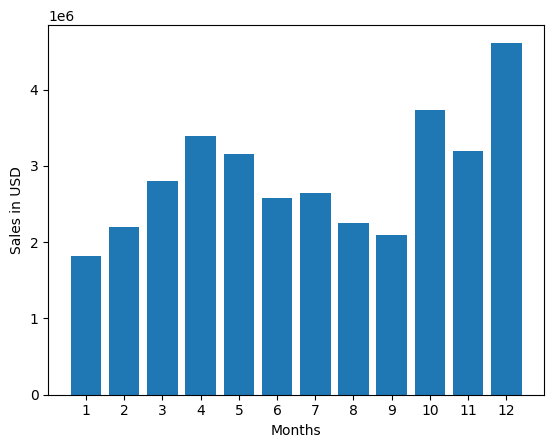

In [10]:
months = range(1,13)
plt.bar(months, sales_by_month)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.xticks(months)
plt.show()

In [11]:
month_grp['Price Each'].max()

Month
1     1700.0
2     1700.0
3     1700.0
4     1700.0
5     1700.0
6     1700.0
7     1700.0
8     1700.0
9     1700.0
10    1700.0
11    1700.0
12    1700.0
Name: Price Each, dtype: float64

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [13]:
#df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ', ' + x.split(',')[2].split(' ')[1])
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1]}, {x.split(',')[2].split(' ')[1]}")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,"Boston, MA"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,"Portland, OR"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,"San Francisco, CA"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,"Los Angeles, CA"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,"Austin, TX"
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,"San Francisco, CA"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,"Los Angeles, CA"
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,"Seattle, WA"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,"Dallas, TX"


In [14]:
city_grp = df.groupby('City')

In [15]:
sales_by_city = city_grp['Sales'].sum()
sales_by_city

City
 Atlanta, GA          2795498.58
 Austin, TX           1819581.75
 Boston, MA           3661642.01
 Dallas, TX           2767975.40
 Los Angeles, CA      5452570.80
 New York City, NY    4664317.43
 Portland, ME          449758.27
 Portland, OR         1870732.34
 San Francisco, CA    8262203.91
 Seattle, WA          2747755.48
Name: Sales, dtype: float64

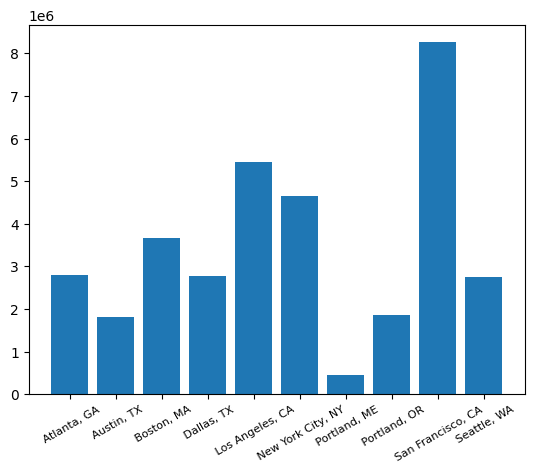

In [16]:
cities = [city for city, df in df.groupby('City')]
plt.bar(cities, sales_by_city)
plt.xticks(cities, rotation = 30, size = 8)
plt.show()

In [17]:
df['Hour'] = df['Order Date'].str[9:11]
#df['Order Date'] = pd.to_datetime(df['Order Date'])
#df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,"Boston, MA",21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,"Portland, OR",14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,"San Francisco, CA",13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,"Los Angeles, CA",20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,"Austin, TX",11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,"San Francisco, CA",20
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,"Los Angeles, CA",12
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,"Seattle, WA",06
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,"Dallas, TX",10


In [18]:
hour_group = df.groupby('Hour')
total_sales_by_hour = hour_group['Sales'].count()

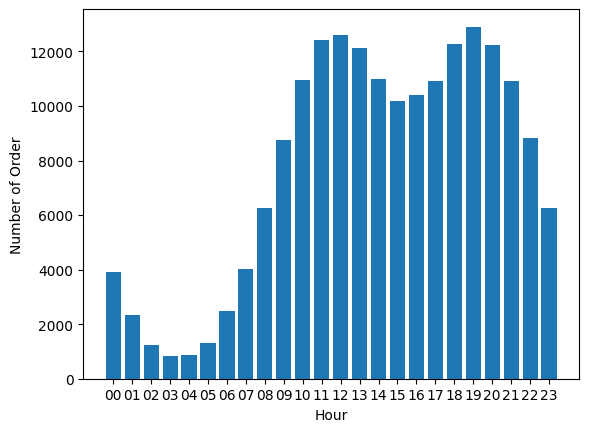

In [19]:
hours = range(0, 24)
hours = [hour for hour, df in df.groupby('Hour')]
plt.bar(hours, total_sales_by_hour)
plt.xticks(hours)
plt.ylabel('Number of Order')
plt.xlabel('Hour')
plt.show()

In [20]:
df1 = df[df['Order ID'].duplicated(keep = False)]
df1.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.95,"Austin, TX",16
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.99,"Austin, TX",16
57,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,150.00,"Los Angeles, CA",08
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,11.52,"Los Angeles, CA",08
133,141365,Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,400.00,"New York City, NY",11
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,11.99,"New York City, NY",11
153,141384,Google Phone,1,600.00,01/03/19 00:14,"223 Jackson St, Boston, MA 02215",1,600.00,"Boston, MA",00
154,141384,USB-C Charging Cable,1,11.95,01/03/19 00:14,"223 Jackson St, Boston, MA 02215",1,11.95,"Boston, MA",00
220,141450,Google Phone,1,600.00,01/12/19 11:16,"521 Park St, San Francisco, CA 94016",1,600.00,"San Francisco, CA",11
221,141450,Bose SoundSport Headphones,1,99.99,01/12/19 11:16,"521 Park St, San Francisco, CA 94016",1,99.99,"San Francisco, CA",11


In [21]:
id_grp = df1.groupby('Order ID')
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
df1

C:\Users\locdu\AppData\Local\Temp\ipykernel_12324\3392275894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
186710,319536,"Macbook Pro Laptop, Wired Headphones"
186731,319556,"Google Phone, Wired Headphones"
186760,319584,"iPhone, Wired Headphones"
186773,319596,"iPhone, Lightning Charging Cable"


In [22]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(15):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80
(' Lightning Charging Cable', ' Wired Headphones') 62
('Lightning Charging Cable', ' USB-C Charging Cable') 55
('Lightning Charging Cable', ' AA Batteries (4-pack)') 52
('AA Batteries (4-pack)', ' Lightning Charging Cable') 51
('Lightning Charging Cable', ' Lightning Charging Cable') 51


In [23]:
prod_grp = df.groupby('Product')
total_orders_by_prod = prod_grp['Quantity Ordered'].sum()
#total_orders_by_prod.sort_values( inplace = True)
total_orders_by_prod

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

C:\Users\locdu\AppData\Local\Temp\ipykernel_12324\28563348.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size =8)


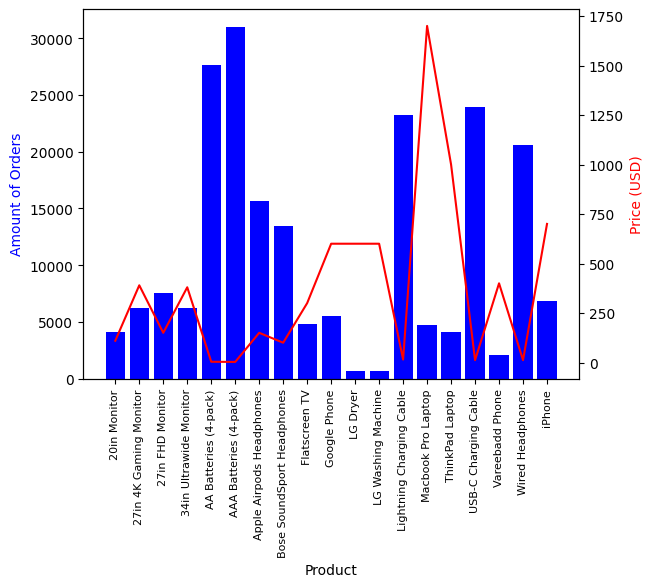

In [24]:
products = [products for products, df in prod_grp]
prices = prod_grp['Price Each'].mean()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, total_orders_by_prod, color = 'b')
ax1.set_xlabel('Product')
ax1.set_ylabel('Amount of Orders', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size =8)

ax2.plot(products, prices, 'r-')
ax2.set_ylabel('Price (USD)', color = 'r')

plt.show()